# Similarity Measures

* Author: Johannes Maucher
* Last update: 15th February 2021


In many computer vision tasks it is necessary to compare the similarity between images and image-regions. In [the introduction of image features](globalDescriptors.ipynb) global-, subwindow- and local- image descriptors have been distinguished. Independent of this descriptor type, each descriptor is a numeric vector. Hence, in order to compare image(-regions) we need methods to calculate the similarity of numeric vectors. Actually there exists a bunch of different similarity-measures. The most important of them are defined in this section.



**Motivation:**
Given the following 3 vectors `v1`, `v2` and `v3`, the question is: 

*Is `v1` or `v3` more similar to `v2`?* 

In [1]:
import numpy as np
v1=np.array([1,5,1,1,1,7,1,1])
print("v1 = ",v1)
v2=np.array([1,1,5,1,1,1,7,1])
print("v2 = ",v2)
v3=np.array([7,5,1,1,1,1,1,1])
print("v3 = ",v3)

v1 =  [1 5 1 1 1 7 1 1]
v2 =  [1 1 5 1 1 1 7 1]
v3 =  [7 5 1 1 1 1 1 1]


The 3 vectors are visualized below:

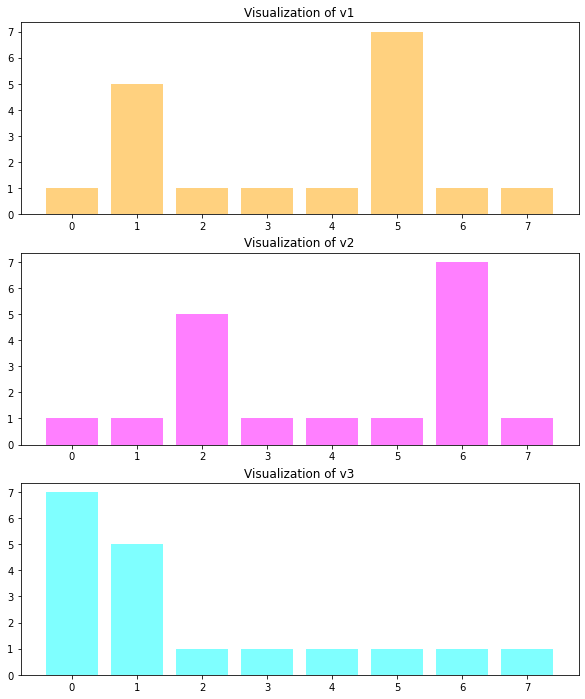

In [2]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
plt.bar(np.arange(0,8),v1,color="orange",alpha=0.5)
plt.title("Visualization of v1")
plt.subplot(3,1,2)
plt.bar(np.arange(0,8),v2,color="magenta",alpha=0.5)
plt.title("Visualization of v2")
plt.subplot(3,1,3)
plt.bar(np.arange(0,8),v3,color="cyan",alpha=0.5)
plt.title("Visualization of v3")
plt.show()

## Similarity and Distance
The **similarity** between a pair of vectors $\mathbf{u}=(u_0,u_1,\ldots,u_{N-1})$ and $\mathbf{v}=(v_0,v_1,\ldots,v_{N-1})$, each of length $N$, is denoted by 

$$s(\mathbf{u},\mathbf{v}).$$ 

The **distance** between the same pair of vectors is denoted by 

$$d(\mathbf{u},\mathbf{v}).$$ 

Distance and similarity are inverse to each other, i.e. the higher the distance the lower the similarity between anc vice versa. Below the most important distance- and similarity-measures are described. Some of them are primarily defined as distance-metric (e.g. euclidean distance) and a transformation-function can be applied to compute the associated similarity. Others are primarily defined as similarity-metric (e.g. cosine similarity) and a transformation function can be applied to compute the associated distance.

In the context of this section vectors represent Histograms. However, the distance metrics described below can be applied for arbitrary numeric vectors. 

We denote by 

\begin{equation}
H_q = \left(H_q(0),H_q(1),H_q(2),\ldots,H_q(N) \right)
\end{equation}

the N-bin histogram of an image(-region) $q$. The value $H_q(i)$ is the frequency of the values in $q$, which fall into the $i.th$ bin.

**Normalized Histogram:**

A normalized representation $H^n_q$ of histogram $H_q$ can be obtained as follows:

$$
H^n_q := \frac{1}{m_q} \left(H_q(0),H_q(1),H_q(2),\ldots,H_q(Z) \right),
$$ (normalizehist)

where

\begin{equation}
m_q=\sum\limits_{i=1}^Z H_q(i)
\end{equation}

## Common Distance- and Similarity Metrics



### Euclidean Distance

The Euclidean distance between two histograms $H_q$ and $H_p$ is

\begin{equation}
d_E(H_q,H_p)=\sqrt{\sum_i (H_q(i)-H_p(i))^2}
\end{equation}

The corresponding similarity measure is

\begin{equation}
s_E(H_q,H_p)=\frac{1}{d_E(H_q,H_p)+\epsilon},
\end{equation}

where $\epsilon$ is a small value $>0$, used to avoid zero-division.

Characteristics of the Euclidean distance $d_E(H_q,H_p)$ are:

- Value range: In general $[0,\infty[$.
- All bins are weighted equally
- Strong impact of outliers
- *Bin-by-Bin comparison*. Drawback: If two images are identical up to a small brightness change, then the histograms look similar up to a small shift along the x-axis (see $v1$ and $v2$ in the example above). However, such a type of similarity can not be measured by a Bin-by-Bin metric.



### Cosine Similarity

The Cosine similarity between two histograms $H_q$ and $H_p$ is

\begin{equation}
s_C(H_q,H_p)= \frac{\sum_i H_q(i)\cdot H_p(i)}{\sqrt{\sum_i H_q(i)^2 \cdot \sum_i H_p(i)^2}},
\end{equation}


The corresponding distance measure is

\begin{equation}
d_C(H_q,H_p)=1-s_C(H_q,H_p)
\end{equation}

Characteristics of the Cosine similarity $s_C(H_q,H_p)$:

- Value range: $[-1,1]$ 
- Bin-by-bin comparison
- Regards the angle between vectors. Two vectors are maximal similar, if they point to the same direction (the angle between them is 0°).

### Pearson Correlation 

The Pearson correlation (similarity measure) between two histograms $H_q$ and $H_p$ is

\begin{equation}
s_P(H_q,H_p)= \frac{\sum_i (H_q(i)-\mu_q)\cdot (H_p(i)-\mu_p)}{\sqrt{\sum_i (H_q(i)-\mu_q)^2 \cdot \sum_i (H_p(i)-\mu_p)^2}},
\end{equation}

where 

$$
\mu_q = \frac{1}{N} \sum\limits_{i=1}^N H_q(i)
$$

is the mean value over all bins in $H_q$.

The corresponding distance measure is

\begin{equation}
d_P(H_q,H_p)=1-s_P(H_q,H_p)
\end{equation}

Characteristics of the Pearson correlation $s_P(H_q,H_p)$:

- Value range: $[-1,1]$ 
- Bin-by-bin comparison
- Ignores different offsets and is an measure for linearity


### Bray-Curtis Distance

The Bray-Curtis distance between two histograms $H_q$ and $H_p$ is

\begin{equation}
d_{BC}(H_q,H_p)=\frac{\sum_i |H_q(i)-H_p(i)|}{\sum_i|H_q(i)+H_p(i)|}
\end{equation}

The corresponding similarity measure is

\begin{equation}
s_{BC}(H_q,H_p)=1-d_{BC}(H_q,H_p)
\end{equation}

Characteristics:

- Value range: $[0,1]$ for positive signals as in the case of histograms
- Bin-by-bin comparison
- More robust w.r.t. outliers than euclidean distance
- Each bin difference is weighted equally


### Canberra Distance

The Canberra distance between two histograms $H_q$ and $H_p$ is

\begin{equation}
d_{Ca}(H_q,H_p)=\sum_i\frac{|H_q(i)-H_p(i)|}{|H_q(i)|+|H_p(i)|}
\end{equation}

The corresponding similarity measure is

\begin{equation}
s_{Ca}(H_q,H_p)=1-d_{Ca}(H_q,H_p)
\end{equation}

Characteristics:

- Value range: $[0,1]$ 
- Bin-by-bin comparison
- Compared to Bray-Curtis now each bin difference is weighted individually.


### Bhattacharyya Distance

The Bhattacharyya distance between two normalized histograms $H^n_q$ and $H^n_p$ is

\begin{equation}
d_{Ba}(H^n_q,H^n_p)= \sqrt{1-\sum_i \sqrt{H^n_q(i) \cdot H^n_p(i)}}
\end{equation}

Characteristics:

- Value range: $[0,1]$
- Bin-by-bin comparison
- Requires normalized inputs
- Statistically motivated for measuring similarity between probability distributions. Here applied for the univariate case, but also applicable for multivariate distributions. 



### Chi-Square Distance

The Chi-Square ($\chi^2$) distance between two histograms $H_q$ and $H_p$ is

\begin{equation}
d_{\chi^2}(H_q,H_p)=\sum_i \frac{(H_q(i)-H_p(i))^2}{H_q(i)+H_p(i)}
\end{equation}


The corresponding similarity measure is

\begin{equation}
s_{\chi^2}(H_q,H_p)=\frac{1}{d_{\chi^2}(H_q,H_p)+\epsilon},
\end{equation}

where $\epsilon$ is a small value $>0$, used to avoid zero-division.


Characteristics:

- Value range: $[0,\infty]$
- Bin-by-bin comparison
- Each bin is weighted individually
- Statistically motivated for measuring similarity between probability distributions. Here applied for the univariate case, but also applicable for multivariate distributions. 

### Intersection Distance

The Intersection distance between two histograms $H_q$ and $H_p$ is

\begin{equation}
d_{IS}(H_q,H_p)=\sum_i \min(H_q(i),H_p(i))
\end{equation}

The corresponding similarity measure is

\begin{equation}
s_{IS}(H_q,H_p)=\frac{1}{d_{IS}(H_q,H_p)+\epsilon},
\end{equation}

where $\epsilon$ is a small value $>0$, used to avoid zero-division.



Characteristics:

- Histograms shall be normalized 
- Value range is $[0,\infty]$
- Bin-by-bin comparison
- Measures intersection of both histograms
- Introduced in {cite}`swainballard` for color histogram comparison


### Earth Mover Distance (Wasserstein Distance)

All of the distance measures introduced so far, ingore shift-similarity. Shift-similar means, that one histogram is the shifted version of the other. This is actually the case for vectors $v1$ and $v2$ in the example above. The previously defined distance measure compare bin-by-bin. Therefore, they are not able to detect the shift-similarity.

The Earth Mover Distance (EMD) has been introduced in {cite}`rubner`. It's not a bin-by-bin similarity measure and it is capable to detect shift-similarity. The drawback of the EMD is that it is quite complex to calculate.

The EMD between two histograms measures the amount of work, which is necessary to transform one histogram to the other, where work is the product of 

$$
\mbox{amount of pieces that must be shifted} \cdot \mbox{distance of corresponding shift}. 
$$

The idea is sketched in the pictures below:

<img src="https://maucher.home.hdm-stuttgart.de/Pics/emdAll.png" style="width:600px" align="center">

The EMD requires the two histograms to be normalized, i.e. both histograms contain the equal amount of *earth*.

$$
Work  =  \sum (\mbox{ distance moved }) \cdot  (\mbox{ amount moved })
$$

$$
Work  =  \sum\limits_{a=1}^m \sum\limits_{b=1}^n d_{a,b} \cdot  f_{a,b}
$$ (work)

where $m$ is the number of bins in histogram $H_p$ and $n$ is the number of bins in histogram $H_q$. 




The Earth Mover Distance $d_{emd}(H_q,H_p)$ between histogram $H_q$ and histogram $H_p$ is the minimum possible amount of work, required to convert $H_p$ into $H_q$, divided by the sum over all $f_{a,b}$:

$$
Work  =  \frac{\sum\limits_{a=1}^m \sum\limits_{b=1}^n d_{a,b} \cdot  f_{a,b}}{\sum\limits_{a=1}^m \sum\limits_{b=1}^n  f_{a,b}}
$$ (worknormalized)



The EMD is also called Wasserstein-Distance (see [Wikipedia](https://en.wikipedia.org/wiki/Wasserstein_metric)). A nice example for calculating the EMD between two 2-dimensional distributions can be found [here](https://jamesmccaffrey.wordpress.com/2018/03/05/earth-mover-distance-wasserstein-metric-example-calculation/).  

#### Calculation of EMD (Wasserstein-Distance) with scipy
In order to calculate the Wasserstein-distance the [scipy method *wasserstein_distance*](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wasserstein_distance.html) can be applied. This function calculates a variant of the EMD by:
1. The histograms are internally normalized, such that in both histograms the sum over all bins is 1 (like in equation {eq}`normalizehist` ).
2. Work is calculated as in equation {eq}`work`, i.e. not normalized like in {eq}`worknormalized`.

Below, we apply this scipy-method to calculate the Wasserstein-distance between $v1$, $v2$ and $v3$:

In [3]:
print("v1 = ",v1)
print("v2 = ",v2)
print("v3 = ",v3)

v1 =  [1 5 1 1 1 7 1 1]
v2 =  [1 1 5 1 1 1 7 1]
v3 =  [7 5 1 1 1 1 1 1]


In order to calculate the EMD, the vectors $v1$, $v2$ and $v3$ are not sufficient, because these vectors contain only frequencies of 8 different values. It is clear that also the values must be defined. Here, we assume that 
- the first frequency (1 in $v1$) is the frequency of the value $0$ in the first distribution
- the second frequency (5 in $v1$) is the frequency of the value $1$ in the first distribution
- ...
- the last frequency (1 in $v1$) is the frequency of the value $7$ in the first distribution 

We assume that for all 3 distributions we have the same set of 8 values and define them below:

In [4]:
values=list(range(8))
values

[0, 1, 2, 3, 4, 5, 6, 7]

Then the pairwise Wasserstein-distances between $v1$, $v2$ and $v3$ can be calculated as follows:

In [5]:
from scipy.stats import wasserstein_distance

In [6]:
dw12=wasserstein_distance(values,values,v1,v2)
print("Wasserstein distance between v1 and v2 : ",dw12)
dw13=wasserstein_distance(values,values,v1,v3)
print("Wasserstein distance between v1 and v3 : ",dw13)
dw23=wasserstein_distance(values,values,v2,v3)
print("Wasserstein distance between v2 and v3 : ",dw23)

Wasserstein distance between v1 and v2 :  0.5555555555555555
Wasserstein distance between v1 and v3 :  1.666666666666667
Wasserstein distance between v2 and v3 :  2.2222222222222223


Let's check the internal calculation by the example of $v1$ and $v2$:
- As mentioned above, the scipy-method internally first normalizes the histograms:

In [7]:
v1norm=1/np.sum(v1)*v1
v1norm

array([0.05555556, 0.27777778, 0.05555556, 0.05555556, 0.05555556,
       0.38888889, 0.05555556, 0.05555556])

In [8]:
v2norm=1/np.sum(v2)*v2
v2norm

array([0.05555556, 0.05555556, 0.27777778, 0.05555556, 0.05555556,
       0.05555556, 0.38888889, 0.05555556])

* Next, in order to transform the normed $v1$ into the normed $v2$ 
    1. an amount of $4/18$ must be shifted over a distance of $1$ from bin 1 to bin 2.
    2. an amount of $6/18$ must be shifted over a distance of $1$ from bin 5 to bin 6.

* The calculated Wasserstein distance is then

$$
\frac{4}{18} \cdot 1 + \frac{6}{18} \cdot 1 = \frac{10}{18} = 0.555
$$

## Application of different Distance Metrics

Below, we will apply all the distance measures introduced above on the pairwise similarity determination between our example-vectors vectors $v1$, $v2$ and $v3$. 

The [Scipy package spatial.distance](http://docs.scipy.org/doc/scipy/reference/spatial.distance.html) contains methods for calculating the euclidean-, Pearson-Correlation-, Canberra- and Bray-Curtis-distance. As already mentioned the EMD distance is implemented as *wasserstein_distance()* in [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wasserstein_distance.html). The remaining distance measures as well as a corresponding normalization function are defined in this python program.

In [19]:
def normalize(a):
    s=np.sum(a)
    return a/s

def mindist(a,b):
    return 1.0/(1+np.sum(np.minimum(a,b)))

def bhattacharyya(a,b): # this is acutally the Hellinger distance,
                        # which is a modification of Bhattacharyya
                        # Implementation according to http://en.wikipedia.org/wiki/Bhattacharyya_distance
    anorm=normalize(a)
    bnorm=normalize(b)
    BC=np.sum(np.sqrt(anorm*bnorm))
    if BC > 1:
        #print BC
        return 0
    else:
        return np.sqrt(1-BC)

def chi2(a,b):
    idx=np.nonzero(a+b)
    af=a[idx]
    bf=b[idx]
    return np.sum((af-bf)**2/(af+bf))

In [20]:
from scipy.spatial.distance import *
from scipy.stats import wasserstein_distance

In [16]:
methods=[euclidean,correlation,canberra,braycurtis,mindist,bhattacharyya,chi2,wasserstein_distance]
methodName=["euclidean","correlation","canberra","braycurtis","intersection","bhattacharyya","chi2","emd"]

In [17]:
import pandas as pd
distDF=pd.DataFrame(index=methodName,columns=["v1-v2", "v1-v3", "v2-v3"])

,v1-v2,v1-v3,v2-v3
euclidean,NaN,NaN,NaN
correlation,NaN,NaN,NaN
canberra,NaN,NaN,NaN
braycurtis,NaN,NaN,NaN
intersection,NaN,NaN,NaN
bhattacharyya,NaN,NaN,NaN
chi2,NaN,NaN,NaN
emd,NaN,NaN,NaN


In [21]:
values = np.arange(0,len(v1))
for j,m in enumerate(methods):
    if j == len(methods)-1:
       distDF.loc[methodName[j],"v1-v2"]=wasserstein_distance(values,values,v1,v2)
       distDF.loc[methodName[j],"v1-v3"]=wasserstein_distance(values,values,v1,v3)
       distDF.loc[methodName[j],"v2-v3"]=wasserstein_distance(values,values,v2,v3)
    else: 
       distDF.loc[methodName[j],"v1-v2"]=m(v1,v2)
       distDF.loc[methodName[j],"v1-v3"]=m(v1,v3)
       distDF.loc[methodName[j],"v2-v3"]=m(v2,v3)
distDF

,v1-v2,v1-v3,v2-v3
euclidean,10.198039,8.485281,10.198039
correlation,1.316456,0.911392,1.316456
canberra,2.833333,1.500000,2.833333
braycurtis,0.555556,0.333333,0.555556
intersection,0.111111,0.076923,0.111111
bhattacharyya,0.485132,0.387907,0.485132
chi2,14.333333,9.000000,14.333333
emd,0.555556,1.666667,2.222222


The absolute distance values of different distance-measures can not be compared. But we can analyse the for each distance measure the relative distances. 

As can be seen all distance measures, except EMD, calculate the same distance between $v1$ and $v2$ as between $v2$ and $v3$. This is because these distance measures perform a bin-by-bin comparison, and these bin-by-bin comparisons are identical for both vector-pairs. Moreover, all metrics except EMD, find that $v1$ is closer to $v3$ than to $v2$. This contradicts the subjective assessment, because subjectively one would say $v2$ is closer to $v1$, because $v2$ is just a one-step-right-shift of $v1$. 

As will be demonstrated in the [next section](imageRetrieval.ipynb), the performance of, e.g. a CBIR system, strongly depends on the choice of the distance metric. The question on which metric will perform best in a given task and given data can not be determined in advance, it must be determined empirically.